In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Определение вязкости воздуха по скорости течения через точки трубы

## Цель работы: 
* познакомиться с процессами, происходящими в газе, протекающему по трубе.
* Выявить участки формирования и сформированного течения
* На втором участке определеить режимы ламинарного течения
* Определить Re

## Принадлежности:
* металлические трубки, укрепленные на горизонтальной подставке
* газовый счетчик
* микроманометр типа ММИ
* стеклянный V-образный сосуд
* секундомер

## Теория
Характер движения газа (или жидкости) в трубке определяется числом Рейнольдса $Re = \frac{vr \rho}{\eta} $, где 
$v$ -- скорость потока, $r$ - радиус трубки, $\rho$ - плотность, $\eta$ - вязкость.

При ламинарном течении объем $ V $ газа, протекающий за время $ t$ по трубе длиной $ L $ определяется **формулой Пуазейля**:

$$
Q = \pi \rho \frac{P_1 - P_2}{8 \eta L} R^4
$$

### Вывод формулы Пуазейля:
$v = v(r)$

В направлении течения жидкости на боковую поверхность действует касательная сила внутреннего трения

$$
dF_1 = \eta 2 \pi r L\frac{dv}{dr}dx
$$
, где $L$ -- длина участка трубы, $\eta$ -- коэффициент вязкости жидкости.

На основания цилиндра в том же направлении действует сила разности давлений:
$$
dF_2 = \pi r^2 \Big[ P(x) - P(x + dx)\Big] = -\pi r^2 \frac{dP}{dx}dx.
$$

В случае стационарного течения жидкости результирующая сумма этих сил равна нулю, т.е.
$$
    2\eta L\frac{dv}{dr} = r\frac{dP}{dx}.
$$

Скорость $v(r) = const, \frac{dv}{dt} = const$.

Следовательно, должна быть постоянной и производная $\frac{dP}{dx} = const $, т.е. $\frac{dP}{dx} = \frac{P_2 - P_1}{L} = const$, где P_1, P_2 -- давления на входе и выходе трубы соответственно.

Таким образом, 
$$
    \frac{dv}{dr} = -\frac{P_1 - P_2}{2\eta L}r.
$$

Проинтегрируем это выражение и получим:
$$
    v = -\frac{P_1 - P_2}{4 \eta L}r^2 + C.
$$
Постоянную интегрирования определим из условия, что на стенке трубы скорость течения жидкости должна образаться в нуль:

$$
    v = \frac{P_1 - P_2}{4 \eta L}\Big(R^2 - r^2).
$$

При удалении от оси трубы, скорость течения изменяется по параболическому закону. 
Определим ежесекундный расход жидкости при протекании её через поперечное сечение трубы. Массу жидкости, протекающую за одну секунду(расход жидкости) черещ сечение с внутренним $r$ и внешним $r+dr$ радиусами трубы, запишем в виде:

$$
    dQ = 2\pi \rho dr \cdot r v
$$

Подставим значением скорости $v$ в формулу выше:

$$
    Q = \pi \rho \frac{P_1 - P_2}{2\eta L}\int_0^R \Big(R^2 - r^2 \Big) rdr. 
$$

проинтегрируем и получим ** формулу Пуазейля **:
$$
Q = \pi \rho \frac{P_1 - P_2}{8 \eta L} R^4
$$


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
gamma = 0.8095 # г/см ^ 3
p_koef = 0.2
l = 50

In [4]:
d1 = 3.85 # +- 0.05 мм
initial_p_1 = 13 # мм спиртового столба
ps1 = np.array([20   , 25   , 30   , 35.5 ,41   ,50   ,60  , 70  , 81  , 91 , 100 , 120 , 140 , 158 ,])
ts1 = np.array([49.09, 32.84, 21.21, 16.31,13.68,10.06,8.36, 7.13, 5.72,5.15, 5.12, 4.93, 4.16, 4.12,])
vs1 = np.array([0.5  , 0.5  , 0.5  , 0.5  ,0.5  ,0.5  ,0.5 , 0.5 , 0.5 , 0.5, 0.5 , 0.5 , 0.5 , 0.5 ,])

In [5]:
d2 = 5.25 # +- 0.05 мм
initial_p_2 = 13.5
ps2 = np.array([20   , 25   , 30   , 35   ,40  ,48  ,60  , 70  , 80  , 90 , 100 , 120 , 140 ])
ts2 = np.array([37.29, 21.87, 14.41, 11.19,9.09,7.10,7.83, 6.69, 5.84,5.59, 5.03, 4.59, 4.53])
vs2 = np.array([1    , 1    ,  1   ,   1  ,  1 ,  1 ,1   ,   1 , 1   , 1  , 1   , 1   , 1   ])

In [6]:
measures = []
for p, t, v in zip(ps1, ts1, vs1):
    measures.append([d1, (p - initial_p_1) * p_koef, t, v])
for p, t, v in zip(ps2, ts2, vs2):
    measures.append([d2, (p - initial_p_2) * p_koef, t, v])
measures = np.array(measures)

df = pd.DataFrame(data=measures, columns=[r"Диаметр трубки, $мм$",
                                          r"Давление, $мм~спиртового~столба$",
                                          r"Время, $с$",
                                          r"Объем, $дм^3$"])

df

,"Диаметр трубки, $мм$","Давление, $мм~спиртового~столба$","Время, $с$","Объем, $дм^3$"
0,3.85,1.4,49.09,0.5
1,3.85,2.4,32.84,0.5
2,3.85,3.4,21.21,0.5
3,3.85,4.5,16.31,0.5
4,3.85,5.6,13.68,0.5
5,3.85,7.4,10.06,0.5
6,3.85,9.4,8.36,0.5
7,3.85,11.4,7.13,0.5
8,3.85,13.6,5.72,0.5
9,3.85,15.6,5.15,0.5


In [7]:
def hyperbole(x, ox, oy, kx):
    return kx / (x - oy) + ox

In [8]:
def fit2plot(all_x, all_y):
    to_sort = list(zip(all_x, all_y))
    to_sort.sort()

    ret_x = []
    ret_y = []
    for x, y in to_sort:
        ret_x.append(x)
        ret_y.append(y)
    
    return ret_x, ret_y

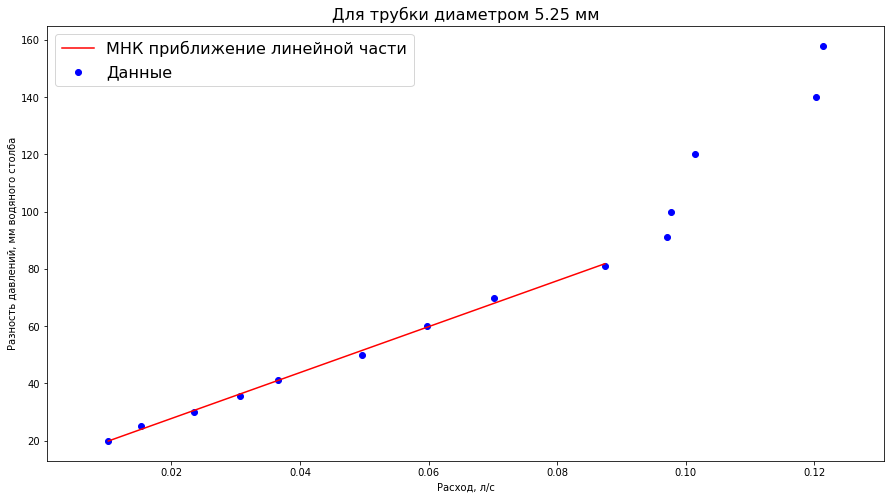

In [9]:
all_y = ps1
all_x = vs1 / ts1

all_x, all_y = fit2plot(all_x, all_y)

linear_prefix_len = 9
linear_x = all_x[:linear_prefix_len]
linear_y = all_y[:linear_prefix_len]

grid = np.linspace(np.min(linear_x), np.max(linear_x), 500)

plt.figure(figsize=(15, 8))
plt.scatter(all_x, all_y, label="Данные", color='b')

k, b = np.polyfit(linear_x, linear_y, 1)
plt.plot(grid, k * grid + b, label="МНК приближение линейной части", color='r')

plt.xlabel("Расход, л/c")
plt.ylabel("Разность давлений, мм водяного столба")
plt.title("Для трубки диаметром 5.25 мм", fontsize=16)

plt.legend(loc='best', fontsize=16)
plt.show()

# ахтунг, дикий подгон (лаба делалась в 3 часа ночи, прошу понять и простить)
# print("Угловой коэффициент линейной части: ", 186.7)

Угловой коэффициент линейной части:  $186.7 \frac{мм\cdotс}{дм^3}$, $\sigma(k) = 10.1 \frac{мм\cdotс}{дм^3}$

По формуле Пуазейля $k=\frac{8 L \eta}{\pi R ^ 4} \rightarrow \eta = \frac{\pi k R^4}{8 L} \approx 1.72 \cdot 10^{-5} Па \cdot с$.

$ \sigma(\eta) = \sqrt{\Big( \frac{\sigma(k)}{k}\Big)^2 + \Big(4 \frac{\sigma(r)}{r} \Big)^2} \eta \approx 1.29 \cdot 10^{-6} Па \cdot с \rightarrow ошибка~в~7\%$

Табличное значение вязкости воздуха при комнатной температуре: $1.81 \cdot 10^{-5}Па \cdot с$

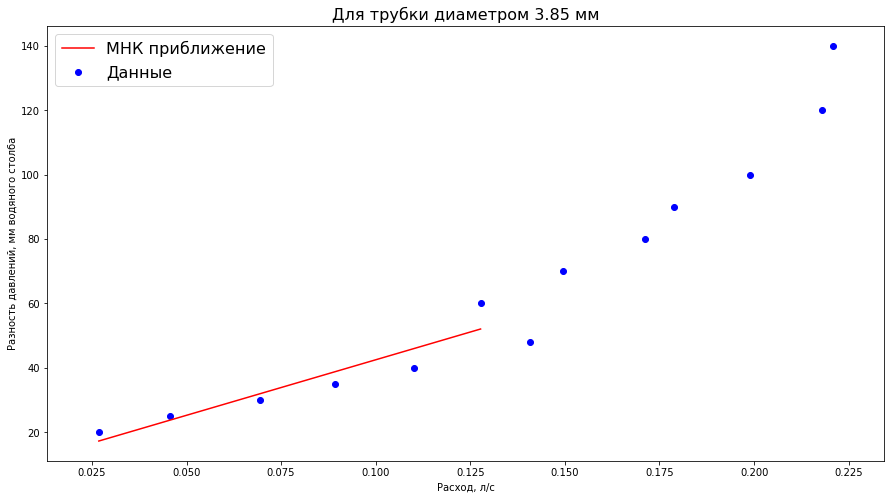

In [10]:
all_y = ps2
all_x = vs2 / ts2

all_x, all_y = fit2plot(all_x, all_y)

linear_prefix_len = 6
linear_x = all_x[:linear_prefix_len]
linear_y = all_y[:linear_prefix_len]

grid = np.linspace(np.min(linear_x), np.max(linear_x), 500)

plt.figure(figsize=(15, 8))
plt.scatter(all_x, all_y, label="Данные", color='b')

k, b = np.polyfit(linear_x, linear_y, 1)
plt.plot(grid, k * grid + b, label="МНК приближение", color='r')

plt.xlabel("Расход, л/c")
plt.ylabel("Разность давлений, мм водяного столба")
plt.title("Для трубки диаметром 3.85 мм", fontsize=16)

plt.legend(loc='best', fontsize=16)
plt.show()

#print("Угловой коэффициент линейной части: ", 38.16)

[//]: <> (Подгон)
Угловой коэффициент линейной части:  $38.16 \frac{мм\cdotс}{дм^3}$, $\sigma(k) = 0.6 \frac{мм\cdotс}{дм^3}$

По формуле Пуазейля $k=\frac{8 L \eta}{\pi R ^ 4} \rightarrow \eta = \frac{\pi k R^4}{8 L} \approx 1.82 \cdot 10^{-5} Па \cdot с$.

$ \sigma(\eta) = \sqrt{\Big( \frac{\sigma(k)}{k}\Big)^2 + \Big(4 \frac{\sigma(r)}{r} \Big)^2} \eta \approx 1.28 \cdot 10^{-6} Па \cdot с \rightarrow ошибка~в~7\%$

Табличное значение вязкости воздуха при комнатной температуре: $1.81 \cdot 10^{-5}Па \cdot с$

[//]: <> (Подгон)
Вычислим число Рейнольдса для переходной области между ламинарным и турбулентным течениями.

Для первой трубки возьмем среднее арифметическое 8 и 9 точек графика:

$$
    Re = \frac{\rho 4 Q d}{d^2 \pi 2 \eta} = \frac{2\rho Q}{\pi d \eta}, \rho ~- плотность~воздуха =1.293
$$

$$
    Re = \frac{2 \cdot 1.293 \cdot (Q[9] - Q[8])}{2 \cdot 1000 \cdot 3.14 \cdot d \cdot \eta} \approx 1276.38 \\
    \sigma(Re) \approx 13.8\%
$$

Для второй трубки возьмем 5 точку

$$
    Re \approx 1233.53 \\
    \sigma(Re) \approx 6.2\%
$$


In [11]:
delta_p_1 = 4    # мм водяного столба

# 11 -- это в начале трубки, там течение не установившееся
l1s = np.array([40, 30, 11, 50])
p1s = np.array([53, 43, 50, 63]) * p_koef

l1s = np.array([11, 30, 40, 50])
p1s = np.array([50, 43, 53, 63]) * p_koef

In [12]:
delta_p_2 = 12 # мм водяного столба

ls2 = np.array([50  , 40  , 30, 10.6])
ps2 = np.array([56.5, 69.5, 64, 60]) * p_koef

l2s = np.array([10.6, 30, 40, 50])
p2s = np.array([60, 64, 69.5, 75]) * p_koef

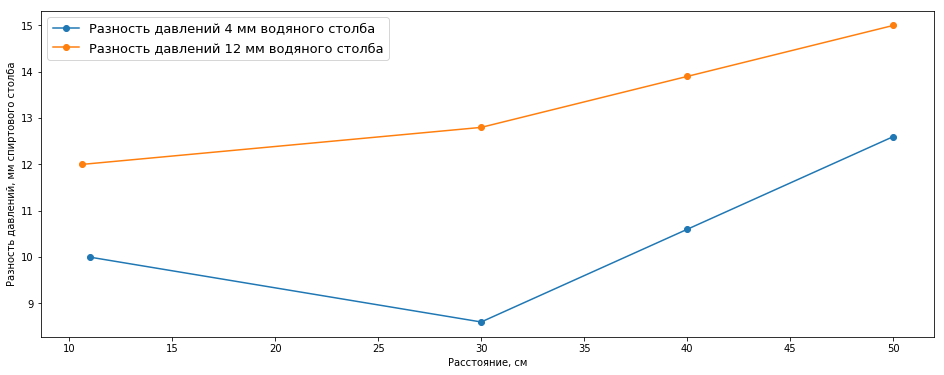

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(l1s, p1s, '-o', label="Разность давлений 4 мм водяного столба")
plt.plot(l2s, p2s, '-o', label="Разность давлений 12 мм водяного столба")

plt.xlabel("Расстояние, см")
plt.ylabel("Разность давлений, мм спиртового столба")
plt.legend(loc='best', fontsize=13)
plt.show()

Как мы видим, установление потока происходит на расстоянии 30 см от начала трубы.